In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. MNIST data

![picture](https://wikidocs.net/images/page/60324/mnist.png)

MNIST is a large database of handwritten digits that is commonly used for training various image processing systems (from wikipedia).

![picture](https://wikidocs.net/images/page/60324/mnist_SVbcYYG.png)

As images are given with 28 x 28 pixels, vectors consisting of 784 (=28x28) elements will be used to solve the problem. Integers of 0 (white) ~ 255 (black) are assigned.

![picture](https://wikidocs.net/images/page/60324/%EB%8B%A4%EC%9A%B4%EB%A1%9C%EB%93%9C.png)

# 2. Introduction of torchvision

Refer to this link for detailed information on what datasets, models, and transforms torchvision provides.
https://pytorch.org/docs/stable/torchvision/index.html

# 3. Settings for MNIST classifier

In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [3]:
USE_CUDA = torch.cuda.is_available()      # if GPU is available TRUE, otherwise FALSE
device = torch.device("cuda" if USE_CUDA else "cpu")  # Use GPU if available, otherwise use CPU
print("we use:", device)

we use: cuda


In [4]:
# random seed
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [5]:
# hyperparameters fixed
training_epochs = 15
batch_size = 100

# 4. MNIST classifier

In [6]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 34972750.95it/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 16532782.02it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31588355.59it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5436794.74it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [7]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

In [8]:
# model
linear = nn.Linear(784, 10, bias=True).to(device)   # input_dim = 784, output_dim = 10, computation on GPU

In [9]:
# cost function and optimizer
criterion = nn.CrossEntropyLoss().to(device)    # softmax function is included internally
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [10]:
# model training
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for X, Y in data_loader:
    X = X.view(-1, 28*28).to(device)  # the size of X should be (100, 784) as the batch size is 100
    Y = Y.to(device)    # integer 0~9

    optimizer.zero_grad()
    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning completed!!')

Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577715
Epoch: 0003 cost = 0.331264287
Epoch: 0004 cost = 0.316404670
Epoch: 0005 cost = 0.307106972
Epoch: 0006 cost = 0.300456554
Epoch: 0007 cost = 0.294933438
Epoch: 0008 cost = 0.290956199
Epoch: 0009 cost = 0.287074119
Epoch: 0010 cost = 0.284515619
Epoch: 0011 cost = 0.281914055
Epoch: 0012 cost = 0.279526889
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874794
Epoch: 0015 cost = 0.274422765
Learning completed!!


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.8883000016212463
Label:  8
Prediction:  3


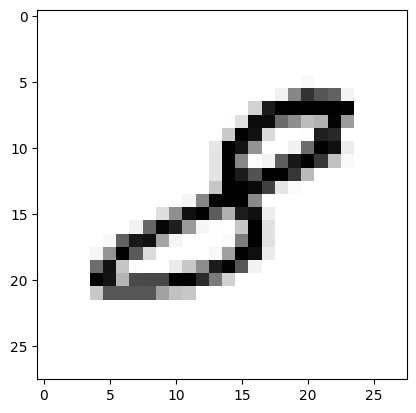

In [16]:
# model test
with torch.no_grad():
  X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = linear(X_test)
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

  # predict one randomly chosen sample
  r = random.randint(0, len(mnist_test) - 1)
  X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

  print('Label: ', Y_single_data.item())
  single_prediction = linear(X_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item())

  # visualization of the single selected sample
  plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
  plt.show()